# PAGA Connectivities

PAGA is run for the same sets of clusters for scATAC and scRNA. A heatmap can be plotted with cluster x cluster connectivities for scATAC and scRNA on the same plot. Plus links laid out on UMAP.

Inputs:
1. PAGA connectivities matrix for scATAC clusters (on converted cluster IDs [check])
2. PAGA connectivities matrix for scRNA on transfered clusters (on converted cluster IDs [check])
3. `metadata.tsv` with UMAP/densMAP coordinates, day and cluster.
4. Cluster config.

In [1]:
library(ggplot2)
library(reshape2)
library(ggasym)

In [2]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14")

## Load Inputs

In [3]:
atac_conns = read.table("../../analysis/20200217_trajectory/sessions/20201022_n53906/connectivities.tsv")
atac_conns

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
c1,0.0000000000,0.7530164971,0.0541994953,0.2394041736,0.003969594,0.0072007119,0.0027159365,0.000000000,0.0004899235,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000
c2,0.7530164971,0.0000000000,1.0000000000,0.7171892535,0.119324468,1.0000000000,0.2823844426,0.076654943,0.1887039442,0.0000000000,0.003855327,0.003756696,0.0004988481,0.0000000000
c3,0.0541994953,1.0000000000,0.0000000000,0.7041117925,0.963534319,0.1511692799,0.0174053239,0.003078313,0.2167624114,0.0072137615,0.014276691,0.010917350,0.0010417038,0.0005817817
c4,0.2394041736,0.7171892535,0.7041117925,0.0000000000,0.332324657,0.5418372127,0.1292776972,0.003136090,0.2318331252,0.0276553689,0.002812070,0.006755179,0.0006064319,0.0002116790
c5,0.0039695942,0.1193244679,0.9635343194,0.3323246573,0.000000000,0.0889855923,0.0119564951,0.002885849,0.1488518388,0.7072010491,0.002515804,0.012563639,0.0686043111,0.0211345316
c6,0.0072007119,1.0000000000,0.1511692799,0.5418372127,0.088985592,0.0000000000,1.0000000000,0.079892084,0.4058065257,0.0017395609,0.005837143,0.011472573,0.0018023702,0.0001198341
c7,0.0027159365,0.2823844426,0.0174053239,0.1292776972,0.011956495,1.0000000000,0.0000000000,0.300065078,1.0000000000,0.0007424525,1.000000000,0.022620665,0.0013187311,0.0004091660
c8,0.0000000000,0.0766549429,0.0030783126,0.0031360902,0.002885849,0.0798920841,0.3000650781,0.000000000,0.0038955950,0.0000000000,1.000000000,0.013016911,0.0013527416,0.0000000000
c9,0.0004899235,0.1887039442,0.2167624114,0.2318331252,0.148851839,0.4058065257,1.0000000000,0.003895595,0.0000000000,1.0000000000,0.581989852,0.779669028,0.1864414479,0.0009641277


In [4]:
rna_conns = read.table("../../analysis/20201005_RNA_trajectory/sessions/20201022_n59369_ATAC_20201022_n53906/connectivities.tsv")
rna_conns

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
c1,0.0000000000,1.000000000,0.112080236,0.2152336012,0.013961146,0.247925302,0.69735873,0.030292652,0.05306638,0.008082429,0.013249453,0.001223023,0.0007753059,0.0008909487
c2,1.0000000000,0.000000000,1.000000000,0.4938930272,0.194631025,1.000000000,1.00000000,0.079781373,1.00000000,0.675224929,0.198986136,0.007530841,0.1108248515,0.0092202872
c3,0.1120802362,1.000000000,0.000000000,0.4850010026,0.126454207,0.471416686,0.25371297,0.016803068,0.34208449,0.059271908,0.033666936,0.012434582,0.0098094588,0.0017169422
c4,0.2152336012,0.493893027,0.485001003,0.0000000000,0.246967575,0.462764141,0.70362570,0.002284699,0.30697638,0.049819705,0.012029883,0.027050012,0.0158196296,0.0002640414
c5,0.0139611455,0.194631025,0.126454207,0.2469675751,0.000000000,0.100665388,0.03977939,0.000000000,0.04796684,0.430173474,0.001681804,0.003895359,0.0192465456,0.0024547518
c6,0.2479253024,1.000000000,0.471416686,0.4627641406,0.100665388,0.000000000,1.00000000,0.438587918,0.56882148,0.137825777,0.072319176,0.050088983,0.0024224472,0.0089433450
c7,0.6973587285,1.000000000,0.253712973,0.7036256992,0.039779391,1.000000000,0.00000000,1.000000000,1.00000000,0.557160980,1.000000000,0.317437644,0.0604795257,0.0706154859
c8,0.0302926516,0.079781373,0.016803068,0.0022846991,0.000000000,0.438587918,1.00000000,0.000000000,0.16097544,0.054781065,1.000000000,0.061019331,0.0000000000,0.0075014404
c9,0.0530663783,1.000000000,0.342084489,0.3069763773,0.047966838,0.568821479,1.00000000,0.160975443,0.00000000,1.000000000,0.942323703,0.587265005,0.1590193873,0.0435183165


### ATAC MetaData

In [5]:
# should contain, sample_barcode as rowname, sample, umap1, umap2, cluster
metaData = read.table("../../analysis/20200206_pmat_snapATAC/sessions/20201022_n53906/metadata.tsv", header = T)
rownames(metaData) = paste(metaData$sample, metaData$barcode, sep='_')
metaData$sample = factor(metaData$sample, levels=DAYS)
dim(metaData)
head(metaData, 5)

[1] 53906     5

,barcode,sample,umap1,umap2,cluster
,<fct>,<fct>,<dbl>,<dbl>,<int>
D0_AACGCGAGAAGGACCA,AACGCGAGAAGGACCA,D0,8.373301,-4.292619,5
D0_AACGCGCTGTCTGTGA,AACGCGCTGTCTGTGA,D0,2.033609,-7.860645,5
D0_ACCTATGGACTCGATA,ACCTATGGACTCGATA,D0,3.093788,-7.469210,5
D0_ACGCAGAGATAACCCA,ACGCAGAGATAACCCA,D0,6.001364,-7.523576,5
D0_ACTCGCTACTTGTGAC,ACTCGCTACTTGTGAC,D0,3.343237,-8.114589,5


### Cluster Config

In [6]:
cluster_config = read.table("../../figures_factory/configs/cluster.tsv", comment.char = '', sep='\t', header=T)
cluster_config

cluster,colour,description,new_cluster
<int>,<fct>,<fct>,<int>
1,#A6D854,Pre-iPSC,14
2,#F0A118,Intermediate,12
3,#E85F6D,Fibroblast-like,3
4,#006658,Neural-like,8
5,#B03743,Fibroblast,1
6,#CF175A,Fibroblast-like,4
7,#78A824,Pre-iPSC,13
8,#F4D5CD,Intermediate,11
9,#D4B81C,Intermediate,9


In [7]:
metaData$cluster_new_id = cluster_config[metaData$cluster, "new_cluster"]

## Join Matrices

Some clusters may be missing from one or the other matrix. Make a matrix with union of clusters with RNA connectivities upper triangle and ATAC connectivities lower triangle.

In [8]:
all_clusts = union(colnames(atac_conns),(colnames(rna_conns)))
conn_mat = matrix(0, length(all_clusts), length(all_clusts))
rownames(conn_mat) = all_clusts
colnames(conn_mat) = all_clusts

In [9]:
# fill in values
# ATAC lower triangle
for (i in seq(nrow(atac_conns))) {
    if (i>1) {
        for (j in seq(i-1)) {
            rw = colnames(atac_conns)[i]
            cl = colnames(atac_conns)[j]
            
            conn_mat[rw, cl] = atac_conns[rw, cl]
        }
    }
}

# RNA upper triangle
for (i in seq(nrow(rna_conns))) {
    if (i>1) {
        for (j in seq(i-1)) {
            cl = colnames(rna_conns)[i]
            rw = colnames(rna_conns)[j]
            
            conn_mat[rw, cl] = rna_conns[rw, cl]
        }
    }
}

In [10]:
conn_mat

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14
c1,0.0000000000,1.0000000000,0.1120802362,0.2152336012,0.013961146,0.2479253024,0.6973587285,0.030292652,0.0530663783,0.0080824290,0.013249453,0.001223023,0.0007753059,0.0008909487
c2,0.7530164971,0.0000000000,1.0000000000,0.4938930272,0.194631025,1.0000000000,1.0000000000,0.079781373,1.0000000000,0.6752249287,0.198986136,0.007530841,0.1108248515,0.0092202872
c3,0.0541994953,1.0000000000,0.0000000000,0.4850010026,0.126454207,0.4714166864,0.2537129733,0.016803068,0.3420844886,0.0592719081,0.033666936,0.012434582,0.0098094588,0.0017169422
c4,0.2394041736,0.7171892535,0.7041117925,0.0000000000,0.246967575,0.4627641406,0.7036256992,0.002284699,0.3069763773,0.0498197054,0.012029883,0.027050012,0.0158196296,0.0002640414
c5,0.0039695942,0.1193244679,0.9635343194,0.3323246573,0.000000000,0.1006653884,0.0397793905,0.000000000,0.0479668380,0.4301734737,0.001681804,0.003895359,0.0192465456,0.0024547518
c6,0.0072007119,1.0000000000,0.1511692799,0.5418372127,0.088985592,0.0000000000,1.0000000000,0.438587918,0.5688214791,0.1378257774,0.072319176,0.050088983,0.0024224472,0.0089433450
c7,0.0027159365,0.2823844426,0.0174053239,0.1292776972,0.011956495,1.0000000000,0.0000000000,1.000000000,1.0000000000,0.5571609797,1.000000000,0.317437644,0.0604795257,0.0706154859
c8,0.0000000000,0.0766549429,0.0030783126,0.0031360902,0.002885849,0.0798920841,0.3000650781,0.000000000,0.1609754434,0.0547810645,1.000000000,0.061019331,0.0000000000,0.0075014404
c9,0.0004899235,0.1887039442,0.2167624114,0.2318331252,0.148851839,0.4058065257,1.0000000000,0.003895595,0.0000000000,1.0000000000,0.942323703,0.587265005,0.1590193873,0.0435183165
c10,0.0000000000,0.0000000000,0.0072137615,0.0276553689,0.707201049,0.0017395609,0.0007424525,0.000000000,1.0000000000,0.0000000000,0.305941184,0.084080221,0.3829172786,0.1245751885


In [11]:
# remove "c" from rownames and colnames
rownames(conn_mat) = gsub("c", "", rownames(conn_mat))
colnames(conn_mat) = gsub("c", "", colnames(conn_mat))

## Plot

### Connectivity Matrix

In [12]:
melted_conn_mat = melt(conn_mat)

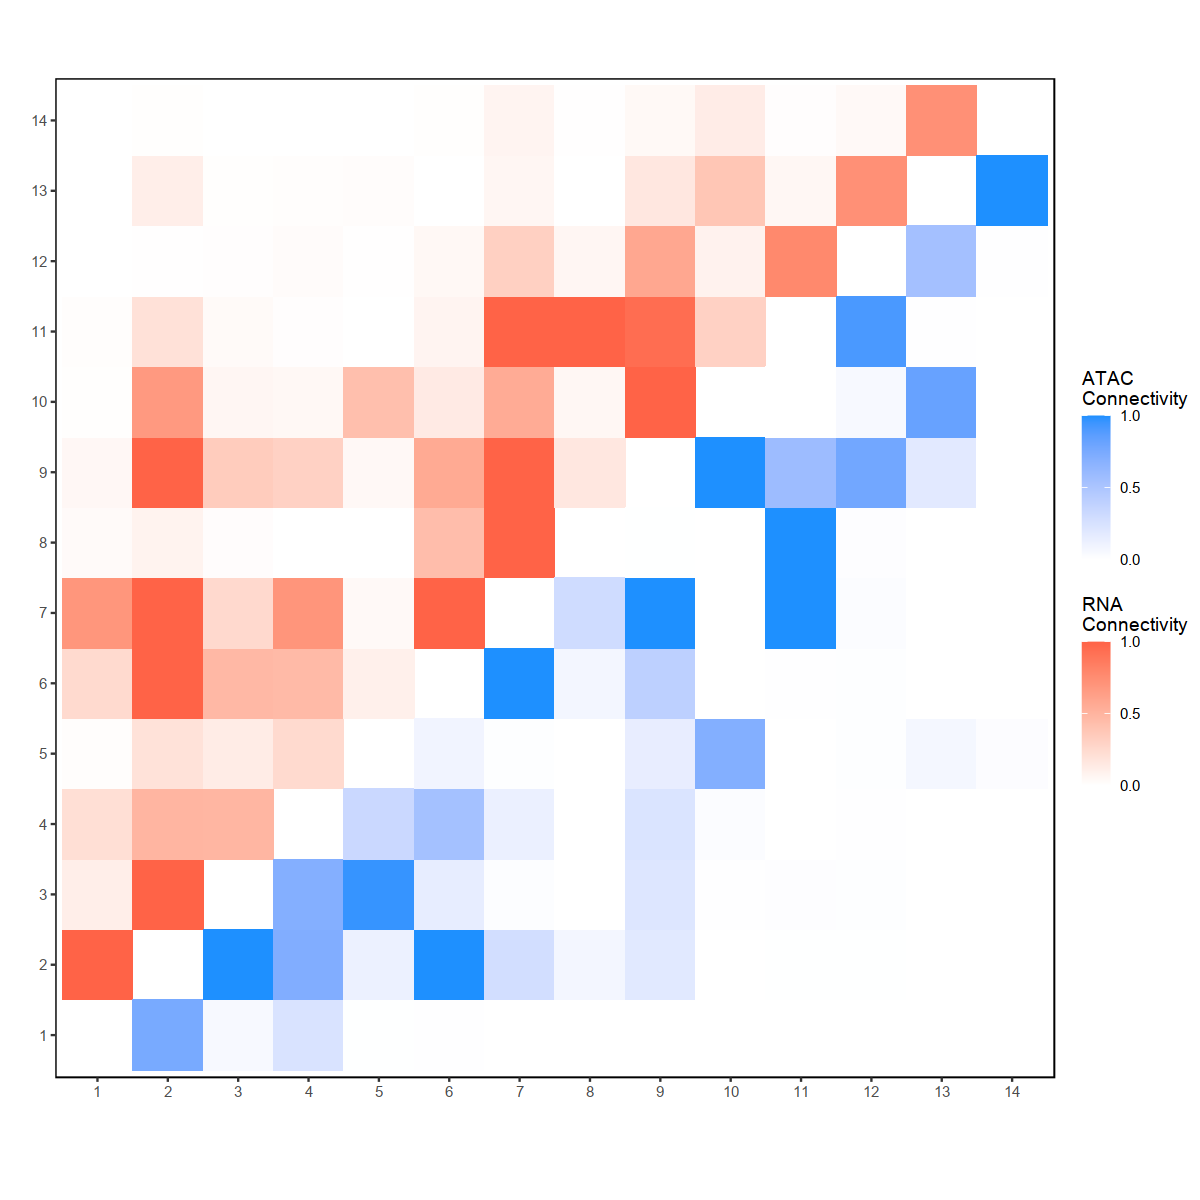

In [23]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(melted_conn_mat, aes(x = factor(Var1), y = factor(Var2))) +
    geom_asymmat(aes(fill_tl = value, fill_br = value)) +
    scale_fill_tl_gradient(low = "white", high = "tomato", name="RNA\nConnectivity", 
                           breaks=c(0,0.5,1)) +
#                           guide = guide_colourbar(direction = "horizontal",
#                                                    order = 3,
#                                                    title.position = "top")) +
    scale_fill_br_gradient(low = "white", high = "dodgerblue", name="ATAC\nConnectivity", 
                           breaks=c(0,0.5,1)) +
#                           guide = guide_colourbar(direction = "horizontal",
#                                                    order = 3,
#                                                    title.position = "top")) +
xlab("") + ylab("") +
theme(panel.background = element_rect(fill = "white"),
      panel.grid = element_blank(),
     panel.border = element_rect(colour = "black", fill=NA, size=.5)) +
coord_fixed()

### Connectivities on UMAP

In [35]:
plot_dimred <- function(x, y, col, dimred="UMAP", subset=NULL, sz=0.5, alpha=1) {
    plot_df <- data.frame(x=x, y=y,
                 cluster=col)
    plot_df = plot_df[sample(dim(plot_df)[1]), ]
    
    if (!is.null(subset)) {
        plot_df = plot_df[plot_df$cluster==subset, ]
    }
    
    ggplot(plot_df) +
    geom_point(aes(x=x, y=y, color=cluster), stroke=0, size=sz, alpha=alpha) +
    theme_classic() +
    xlab(sprintf("%s 1", dimred)) + ylab(sprintf("%s 2", dimred)) +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
    coord_fixed()
}

In [36]:
# umap centroid  points per cluster
coords1 = rep(0, nrow(cluster_config))
coords2 = rep(0, nrow(cluster_config))

for (i in seq(nrow(cluster_config))) {
    coords1[i] = median(metaData[metaData$cluster_new_id==i, "umap1"])
    coords2[i] = median(metaData[metaData$cluster_new_id==i, "umap2"])
}

In [37]:
add_paga_conns_to_plot <- function(umap_plot, conns, coords1, coords2, thresh=0.2, line_scale=2) {
    # add edges
    for (i in seq(nrow(conns))) {
        ci = as.numeric(sub("c", "", rownames(conns)[i]))
        if (i>1) {
            for (j in seq(i-1)) {
               cj = as.numeric(sub("c", "", rownames(conns)[j]))
                if (conns[i, j] > thresh) {
                    umap_plot = umap_plot +
                        annotate("segment", 
                                 x = coords1[ci], 
                                 xend = coords1[cj], 
                                 y = coords2[ci],
                                 yend = coords2[cj],
                                 size=line_scale*conns[i, j])
                }
            }
        }
    }

    # add cluster labels
    for (i in as.numeric(sub("c", "", rownames(conns)))) {
         umap_plot = umap_plot + annotate(geom = "point", 
                                         x = coords1[i], y = coords2[i],
                                         colour = as.character(cluster_config[cluster_config$new_cluster==i,"colour"]), 
                                         size = 15) +
                                annotate(geom = "text", 
                                         x = coords1[i], y = coords2[i],
                                         label = sprintf("%d", i), 
                                         hjust = "center",
                                        size=7)
    }
    
    umap_plot
}

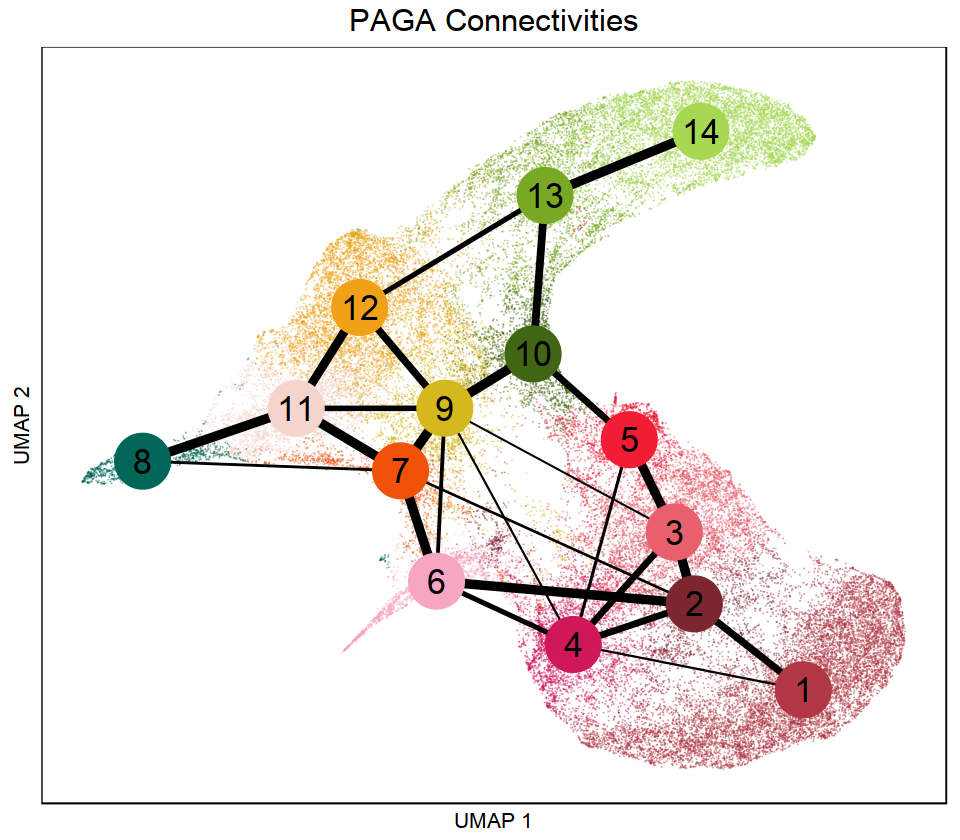

In [48]:
options(repr.plot.width = 8, repr.plot.height = 7)

atac_plot <- plot_dimred(metaData$umap1,
                         metaData$umap2,
                         factor(metaData$cluster_new_id),
                         alpha=0.5,
                         sz=0.25) + 
scale_color_manual(values=as.character(cluster_config$colour)[order(cluster_config$new_cluster)]) +
guides(colour = guide_legend(override.aes = list(shape=16, alpha=1, size=4))) +
ggtitle("PAGA Connectivities") +
theme(legend.position="none", plot.title=element_text(size=18)) 


atac_plot <- add_paga_conns_to_plot(atac_plot, atac_conns, coords1, coords2, thresh=0.2, line_scale=2)

atac_plot

In [50]:
saveRDS(atac_plot, file=sprintf("./subfigs/%s_ATAC_PAGA_connectivities.rds",
                                   format(Sys.Date(), "%Y%m%d")))

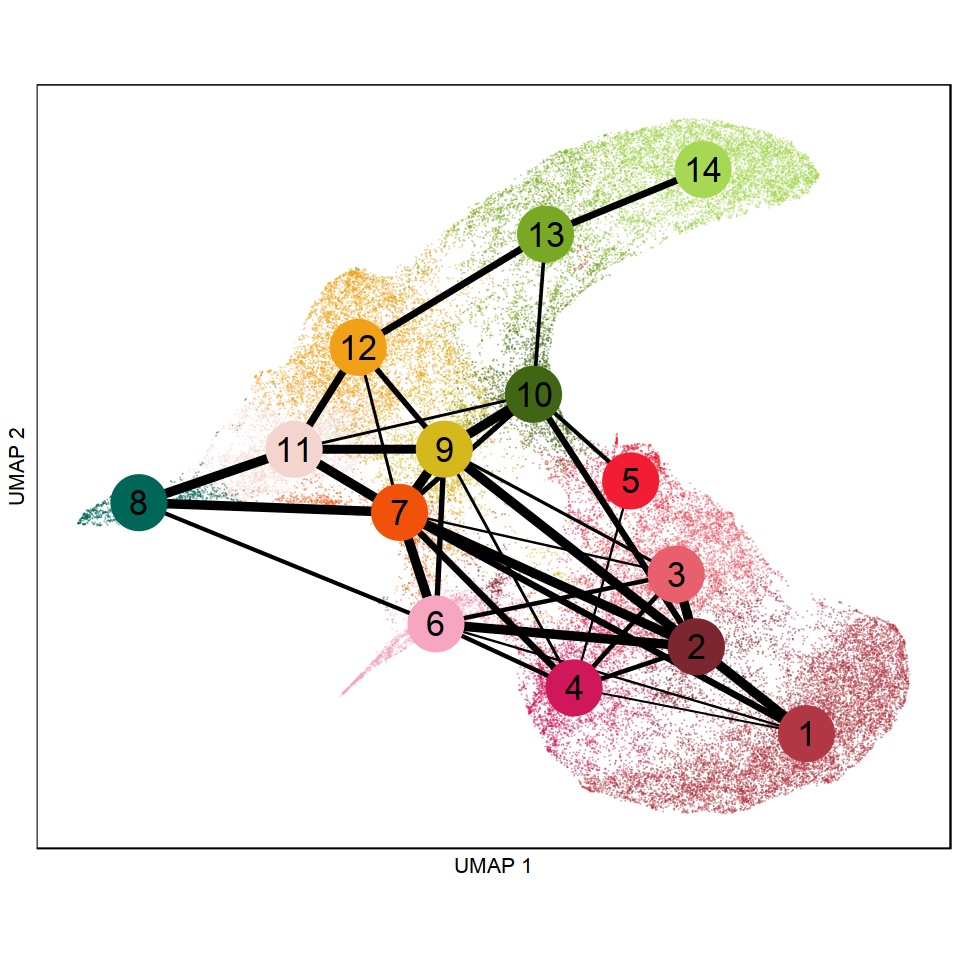

In [49]:
options(repr.plot.width = 8, repr.plot.height = 8)

rna_plot <- plot_dimred(metaData$umap1,
                         metaData$umap2,
                         factor(metaData$cluster_new_id),
                         alpha=0.5,
                         sz=0.25) + 
    scale_color_manual(values=as.character(cluster_config$colour)[order(cluster_config$new_cluster)]) +
    guides(colour = guide_legend(override.aes = list(shape=16, alpha=1, size=4))) +
    theme(legend.position="none",  plot.title=element_text(size=18))


rna_plot <- add_paga_conns_to_plot(rna_plot, rna_conns, coords1, coords2, thresh=0.2, line_scale=2)

rna_plot

---

In [74]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggasym_0.1.5   reshape2_1.4.4 ggplot2_3.3.0 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5         RColorBrewer_1.1-2 pillar_1.4.6       compiler_3.6.3    
 [5] plyr_1.8.6         base64enc_0.1-3    tools_3.6.3        digest_0.6.25     
 [9] uuid_0.1-4         jsonlite_1.6.1     e